In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

**Helpful Links**
- [Video Explanation](https://www.youtube.com/watch?v=S7QIU0i1qLE) 
- [Written Explanation](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html) 

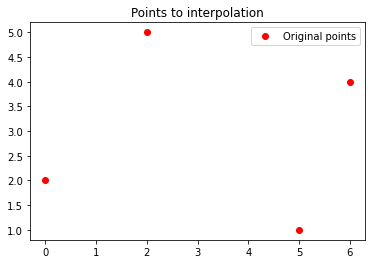

In [7]:
# We will interpolate these points
y = [2, 5, 1, 4]
x = [0, 2, 5, 6]
plt.title("Points to interpolation")
plt.plot(x, y, 'ro', label='Original points')
plt.legend()
plt.show()

## Basic Premise

We will use the following formula to interpolate `x` and `y` values:

$$
f(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + \cdots + a_n(x - x_0)(x - x_1)\cdots(x - x_n)
$$

Because we have 4 points, we will have 4 $a$ coefficients.
Therefore this is the formula we will use: 

$$
f(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + a_3(x - x_0)(x - x_1)(x - x_2)
$$

To start we know that we will sub in the first point $x_0$ into the equation. 
Notice how the $x_0$ values cancel out all coefficients apart from $a_0$:

$$
f(x_0) = y_0 = a_0 + a_1(x_0 - x_0) + a_2(x_0 - x_0)(x_0 - x_1) + a_3(x_0 - x_0)(x_0 - x_1)(x_0 - x_2)
$$

$$
f(x_0) = y_0 = a_0
$$

Therefore we know that $a_0 = y_0$.




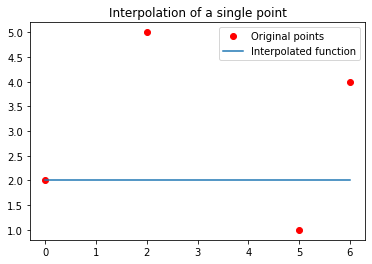

Interpolated function: f(x) = 2


In [13]:
# Visualize function of a single point interpolation
a_0 = y[0]

x_range = np.linspace(0, 6, 100)
y_range = [a_0 for _ in x_range]

plt.title("Interpolation of a single point")
plt.plot(x, y, 'ro', label='Original points')
plt.plot(x_range, y_range, label='Interpolated function')
plt.legend()
plt.show()
print(f"Interpolated function: f(x) = {a_0}")

# Finding 

$$
f(x_1) = y_1 = a_0 + a_1(x_1 - x_0) + a_2(x_1 - x_0)(x_1 - x_1) + a_3(x_1 - x_0)(x_1 - x_1)(x_1 - x_2)
$$

$$
f(x_1) = y_1 = a_0 + a_1(x_1 - x_0)
$$

Therefore solving for $a_1$:
$$
a_1 = \frac{y_1 - y_0}{x_1 - x_0}
$$

This can be re-written as a 
$$
a_1 = \frac{y_1 - y_0}{x_1 - x_0}
$$

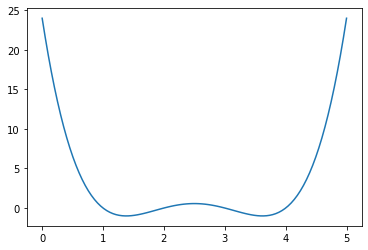

In [31]:
p = Polynomial.fromroots([1, 2, 3, 4], domain=[0, 5])
# np.array(3*p)
# plt.plot(p)

x, y = p.linspace()
plt.plot(x, y)

## Helpful Information

When using the Newton interpolation method we find $a$ coefficients in [Newton Polynomial Form](https://en.wikipedia.org/wiki/Newton_polynomial) rather than standard polynomial form ($a_0 + a_1x + a_2x^2 + ... + a_nx^n$). 

**Benefits** of using Newton Polynomial Form:
- [Online algorithm](https://en.wikipedia.org/wiki/Online_algorithm): New points can be added to the interpolation without having to recompute the entire polynomial
- Can convert to standard polynomial form with a single calculation

**Disadvantages** of using Newton Polynomial Form:
- The form is not as intuitive as standard polynomial form 
- Requires additional calculation to evaluate the polynomial at a point